In [1]:
import pandas as pd

# Replace with your actual file path or name
file_path = r"C:\Users\albin\OneDrive\Internship\exported_data.xlsx"

# Read the Excel file
df = pd.read_excel(file_path, engine='openpyxl')

# Print the contents of the file
print(df)

# Optionally, display column names
print("Columns:", df.columns.tolist())

      Day       Date                   Tasks     Species No. of Animal  \
0       6 2025-04-05         Morning Meeting         NaN             –   
1       6 2025-04-05        Food Preparation         NaN             –   
2       6 2025-04-05        Food Preparation         NaN             –   
3       6 2025-04-05                 Talking         NaN             –   
4       6 2025-04-05  Enrichment Preparation         NaN             –   
...   ...        ...                     ...         ...           ...   
2457    6 2025-04-10              Enrichment    Meerkats           NaN   
2458    6 2025-04-10     Letting animals out    Meerkats           NaN   
2459    6 2025-04-10                 Walking         NaN           NaN   
2460    6 2025-04-10        Food Preparation  Fennec Fox           NaN   
2461    6 2025-04-10           Documentation         NaN           NaN   

           Start Time         End Time  Time Consumed  \
0            06:47:00  07:14:59.999999             28 

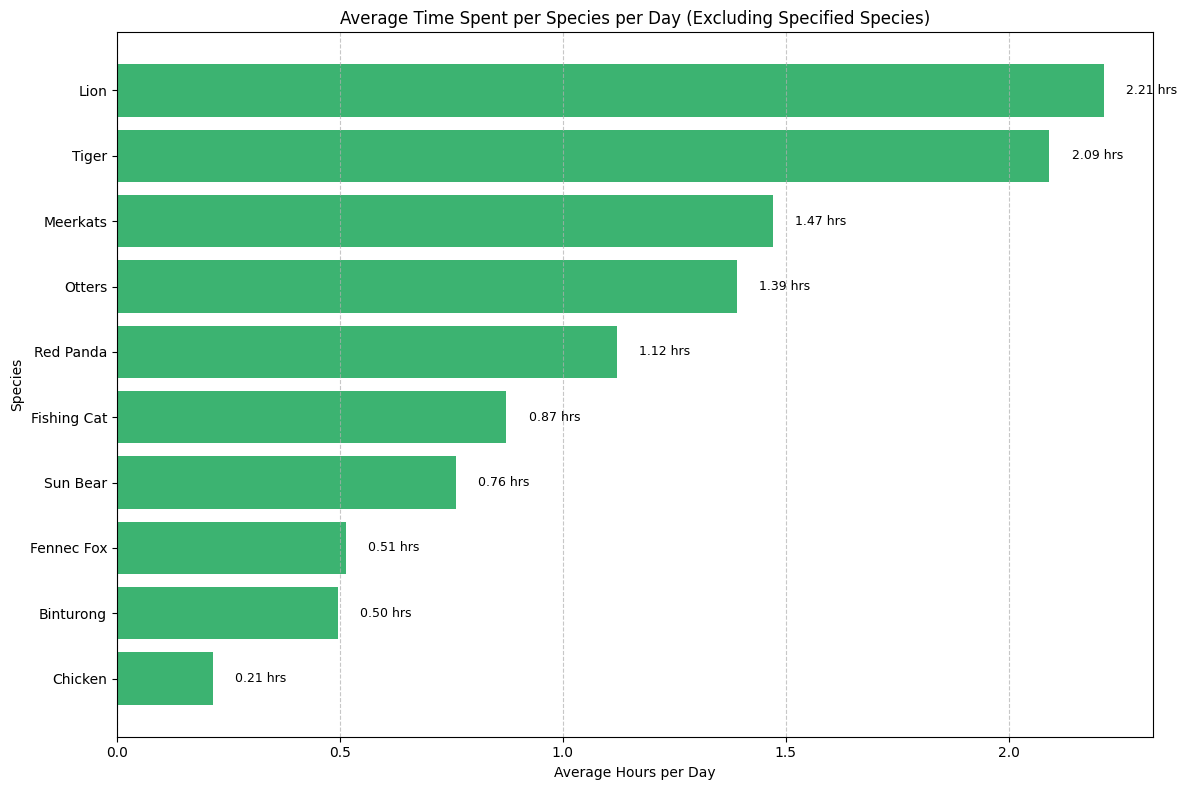

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure correct types
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Hours Consumed'] = pd.to_numeric(df['Time Consumed'], errors='coerce').fillna(0) / 60

# Exclude the specified species
excluded_species = ["Otters & Binturong", "Keeper for a Day", "Sunbear and Otters", "Meerkats & Fennec Fox"]
filtered_df = df[~df['Species'].isin(excluded_species)]

# Compute average hours per species per day
daily_species_hours = filtered_df.groupby(['Date', 'Species'])['Hours Consumed'].sum().reset_index()
avg_species_hours_per_day = daily_species_hours.groupby('Species')['Hours Consumed'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(avg_species_hours_per_day.index[::-1], avg_species_hours_per_day.values[::-1], color='mediumseagreen')

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.05, bar.get_y() + bar.get_height()/2,
             f"{width:.2f} hrs", va='center', ha='left', fontsize=9, color='black')

# Formatting
plt.xlabel("Average Hours per Day")
plt.ylabel("Species")
plt.title("Average Time Spent per Species per Day (Excluding Specified Species)")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()




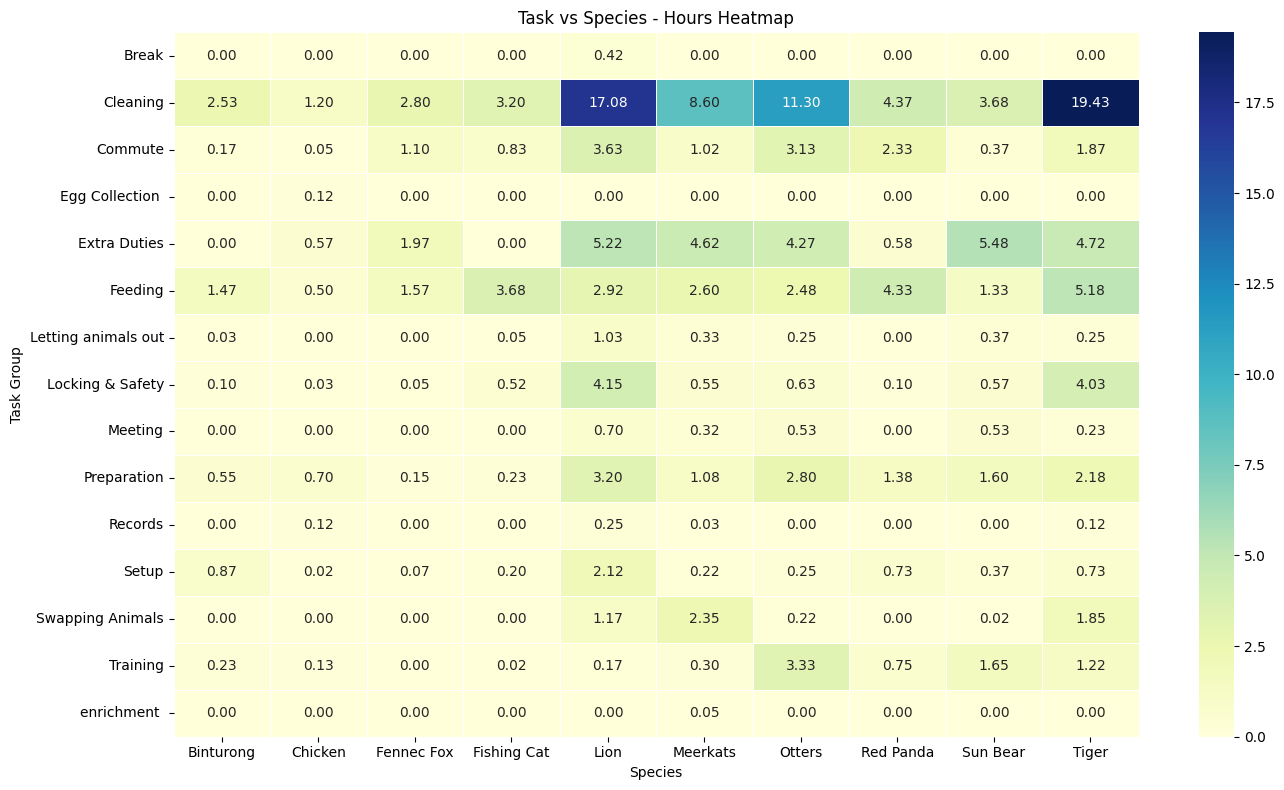

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group tasks based on the provided logic
def group_task(row):
    if "Cleaning" in row['Tasks']:
        return "Cleaning"
    elif row['Tasks'] in ["Lunch Break", "Morning Tea", "Lunch Break "]:
        return "Break"
    elif row['Tasks'] in ["Food Preparation", "Enrichment Preparation", "Collecting Bamboo"]:
        return "Preparation"
    elif row['Tasks'] in ["Walking", "Buggy"]:
        return "Commute"
    elif row['Tasks'] in ["Feeding", "Enrichment"]:
        return "Feeding"
    elif row['Tasks'] in ["Assisting Other Keeper", "Volunteer Work", "Guest Experience", 
                           "Extra duties", "Waiting", "Disposal", "Egg Collection", "Public Interaction", 
                           "Volunteer Induction", "Talking"]:
        return "Extra Duties"
    elif row['Tasks'] in ["Giving Access", "Giving access to den", "Letting Animals Out", 
                          "Letting animals back in den", "Safety Check", "Locking (Double Check)"]:
        return "Locking & Safety"
    elif row['Tasks'] in ["Setup", "Maintenance"]:
        return "Setup"
    elif row['Tasks'] in ["Training & Medication", "Otter Introduction", "Behavioural Observation"]:
        return "Training"
    elif row['Tasks'] in ["Morning Meeting", "Extra Meeting", "Behavioural Observation"]:
        return "Meeting"
    elif row['Tasks'] in ["Documentation", "Updating Whiteboard"]:
        return "Records"
    else:
        return row['Tasks']  # Default to the original task name

# Apply the task grouping
df['Task Group'] = df.apply(group_task, axis=1)

# Exclude the specified species
excluded_species = ["Otters & Binturong", "Keeper for a Day", "Sunbear and Otters", "Meerkats & Fennec Fox"]
filtered_df = df[~df['Species'].isin(excluded_species)]

# Create the Task vs Species matrix (pivot table)
task_species_matrix = filtered_df.pivot_table(
    index='Task Group',
    columns='Species',
    values='Hours Consumed',
    aggfunc='sum',
    fill_value=0
)

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(task_species_matrix, cmap='YlGnBu', annot=True, fmt='.2f', linewidths=0.5)
plt.title("Task vs Species - Hours Heatmap")
plt.xlabel("Species")
plt.ylabel("Task Group")
plt.tight_layout()
plt.show()
